In [1]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. \
import matplotlib.pyplot as plt


In [2]:
train_dir ='C:/Users/Srujan/Documents/Datasets/signatures/train'
test_dir='C:/Users/Srujan/Documents/Datasets/signatures/test'

In [6]:
def preprocess(path):
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    thresh = cv2.erode(thresh, kernel, iterations=3)
    thresh = cv2.dilate(thresh, kernel, iterations=1)
    img = cv2.resize(thresh, (250, 75)) 
    return img

def create_train_data():
    training_data = []
    
    for folder in tqdm(os.listdir(train_dir)):
        
        real1 = os.path.join(train_dir+"/"+folder,'1')
        real2 = os.path.join(train_dir+"/"+folder,'2')
        forge = os.path.join(train_dir+"/"+folder,'forg')
        
        for r2 in tqdm(os.listdir(real2)):
            # loading one image at a time from r2 folder
            r2_path = os.path.join(real2,r2)
            
            try:
                r2_img = preprocess(r2_path) 
                
            except:
                print(r2_path) 
                
            i=0    
            for r1,f in zip(tqdm(os.listdir(real1)),tqdm(os.listdir(forge))):
                
                # this loop creates combinations of images from r1, forge folder with each image in r2 folder 
                i=i+1
                r1_path = os.path.join(real1,r1)
                f_path = os.path.join(forge,f)
                
                # loading image from r1 folder 
                try:
                    r1_img = preprocess(r1_path)
                except:
                    print(r1_path)
                    
                # loading image from forge folder
                try:
                    f_img = preprocess(f_path)
                except:
                    print(f_path)

                training_data.append([np.array(r1_img),np.array(r2_img),np.array(f_img)]) # appending to training data 

                if i==12:
                    break
    
    shuffle(training_data)
    training_data = np.array(training_data)
    np.save('signature_train_75_250.npy', training_data)        
    return training_data

In [7]:
train_data = create_train_data()

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 17%|█████████████▊                                                                     | 2/12 [00:00<00:00, 14.81it/s]


 25%|█████████████████████                                                               | 2/8 [00:00<00:00, 14.03it/s]

 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 11.30it/s]


 38%|███████████████████████████████▌                                                    | 3/8 [00:00<00:00, 11.37it/s]

 33%|███████████████████████████▋                                                       | 4/12 [00:00<00:00,  9.75it/s]


 50%|███████████████████████

 50%|█████████████████████████████████████████▌                                         | 6/12 [00:00<00:00, 58.93it/s]


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:00<00:00, 41.58it/s]

 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:03<00:01,  2.79it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 33%|███████████████████████████▋                                                       | 4/12 [00:00<00:00, 32.38it/s]


 50%|██████████████████████████████████████████                                          | 4/8 [00:00<00:00, 32.85it/s]

 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:00<00:00, 29.70it/s]


 67%|███████████████████████

 25%|████████████████████▊                                                              | 3/12 [00:01<00:04,  1.90it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:00<00:00, 88.75it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 48.71it/s]

 33%|███████████████████████████▋                                                       | 4/12 [00:01<00:03,  2.25it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


 92%|██████████████████████████████████████████████████████████████████████████▎      | 11/12 [00:00<00:00, 104.37it/s]

 42%|████████████████████████

 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:00<00:00, 37.49it/s]

 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 29.23it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 26.00it/s]

  8%|██████▉                                                                            | 1/12 [00:00<00:05,  2.12it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:00<00:00, 83.08it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 67.84it/s]

 17%|█████████████▊          

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 48.41it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 51.68it/s]

 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:03<00:00,  3.99it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:00<00:00, 78.38it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 64.84it/s]

  0%|                        

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:00<00:00, 63.75it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 53.78it/s]

 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:02<00:00,  4.21it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

 92%|██████████████████████████████████████████████████████████████████████████▎      | 11/12 [00:00<00:00, 101.59it/s]

 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:02<00:00,  4.60it/s]

  0%|                         

 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 37.21it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:02<00:03,  2.02it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 44.94it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 43.34it/s]

 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:00<00:00, 38.16it/s]


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:00<00:00, 37.22it/s]

 92%|████████████████████████

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 23%|███████████████████▏                                                               | 3/13 [00:00<00:00, 26.02it/s]


 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 29.98it/s]

 46%|██████████████████████████████████████▎                                            | 6/13 [00:00<00:00, 24.67it/s]


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:00<00:00, 26.72it/s]

 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 24.85it/s]


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:00<00:00, 26.60it/s]

 85%|███████████████████████

 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 45.13it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 46.48it/s]

 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 41.23it/s]


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:00<00:00, 34.61it/s]

 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:03<00:01,  2.54it/s]

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 31%|█████████████████████████▌                                                         | 4/13 [00:00<00:00, 35.96it/s]


 33%|███████████████████████

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 26.67it/s]


 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 27.48it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 23.93it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 24.16it/s]

 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:00<00:00, 22.38it/s]


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:00<00:00, 23.55it/s]

 75%|███████████████████████

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 48.15it/s]

 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:00<00:00, 43.50it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 36.84it/s]

 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:04<00:00,  2.48it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████▌                                         | 6/12 [00:00<00:00, 50.76it/s]


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:00<00:00, 49.68it/s]

 75%|████████████████████████

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 28.62it/s]


 19%|███████████████▌                                                                   | 3/16 [00:00<00:00, 27.39it/s]

 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:00<00:00, 30.31it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 34.36it/s]

 17%|█████████████▊                                                                     | 2/12 [00:01<00:07,  1.38it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                       

 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 25.27it/s]

 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:04<00:01,  2.13it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 33%|███████████████████████████▋                                                       | 4/12 [00:00<00:00, 30.51it/s]


 25%|████████████████████▊                                                              | 4/16 [00:00<00:00, 28.86it/s]

 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 36.22it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 39.04it/s]

 83%|████████████████████████

 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:00<00:00, 22.82it/s]

 27%|██████████████████████▋                                                            | 3/11 [00:02<00:05,  1.35it/s]

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 23%|███████████████████▏                                                               | 3/13 [00:00<00:00, 26.53it/s]


 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 27.19it/s]

 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 23.29it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 23.63it/s]

 62%|████████████████████████

 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 36.66it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 37.35it/s]

 54%|████████████████████████████████████████████▋                                      | 7/13 [00:00<00:00, 27.89it/s]


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:00<00:00, 27.51it/s]

 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 23.42it/s]


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:00<00:00, 22.05it/s]

 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [00:05<00:01,  1.62it/s]

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


  0%|                       

 36%|██████████████████████████████▏                                                    | 4/11 [00:01<00:03,  2.00it/s]

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 23.24it/s]


 19%|███████████████▌                                                                   | 3/16 [00:00<00:00, 23.56it/s]

 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:00<00:00, 28.40it/s]


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:00<00:00, 33.22it/s]

 45%|█████████████████████████████████████▋                                             | 5/11 [00:02<00:02,  2.13it/s]

  0%|                        

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 26.35it/s]


 33%|███████████████████████████▋                                                       | 4/12 [00:00<00:00, 30.50it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 24.85it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:01,  3.73it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                        

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:00,  9.14it/s]


  8%|██████▉                                                                            | 1/12 [00:00<00:01,  8.06it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 10.43it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 15.32it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:01<00:00,  2.57it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                       

 26%|█████████████████████▊                                                             | 5/19 [00:00<00:01, 13.88it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:02,  2.21it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 26.19it/s]


 16%|█████████████                                                                      | 3/19 [00:00<00:00, 27.13it/s]

 26%|█████████████████████▊                                                             | 5/19 [00:00<00:00, 20.45it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:01,  2.41it/s]

  0%|                         

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:01<00:00,  3.36it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 43.66it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:01<00:00,  3.95it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00, 43.41it/s]


 42%|████████████████████████

 17%|██████████████                                                                      | 1/6 [00:00<00:02,  2.21it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 27.93it/s]


 38%|███████████████████████████████▌                                                    | 3/8 [00:00<00:00, 27.26it/s]

 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 21.19it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:01,  2.49it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                        

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 41.54it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:01<00:00,  4.50it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 41.19it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 67%|█████████████████████████

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 38.00it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00,  5.73it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 42.98it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 33%|█████████████████████████

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 19.91it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:01,  2.10it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 21.06it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 21.94it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:01<00:01,  2.35it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                        

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.46it/s]


 17%|█████████████▊                                                                     | 2/12 [00:00<00:00, 14.89it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 14.23it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 15.43it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:01,  2.57it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|████████████████████████

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:01<00:00,  3.16it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 33.43it/s]


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 27.37it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 33%|████████████████████████

 31%|█████████████████████████▉                                                         | 5/16 [00:00<00:00, 49.35it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:00,  9.01it/s]


 17%|█████████████▊                                                                     | 2/12 [00:00<00:00, 12.58it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  9.91it/s]


 33%|███████████████████████████▋                                                       | 4/12 [00:00<00:00, 12.27it/s]

 42%|████████████████████████

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 60.42it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  5.55it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 58.29it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00,  6.19it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 66.03it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                         

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 35.92it/s]


 31%|█████████████████████████▉                                                         | 5/16 [00:00<00:00, 29.09it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:01,  2.77it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 36.52it/s]


 31%|█████████████████████████▉                                                         | 5/16 [00:00<00:00, 30.17it/s]

 50%|████████████████████████

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 33.85it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 33.18it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 25.95it/s]


 33%|███████████████████████

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 22.25it/s]


 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 22.84it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 20.14it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:01,  3.42it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                        

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:01<00:00,  2.28it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 26.32it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 23.83it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:01<00:00,  2.57it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 50%|████████████████████████

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 62.94it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 18.44it/s]


 17%|█████████████▊                                                                     | 2/12 [00:00<00:00, 18.78it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 17.20it/s]


 33%|███████████████████████

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 57.74it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  3.96it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 41.42it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  4.47it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 57.95it/s]

 83%|█████████████████████████

 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 33.87it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:01,  3.96it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 62%|███████████████████████████████████████████████████▉                               | 5/8 [00:00<00:00, 191.30it/s]


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 84.04it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  5.16it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 62%|███████████████████████

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 47.78it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  5.10it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00, 41.09it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 27.89it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  4.71it/s]

  0%|                         

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:02<00:00,  2.40it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 27.61it/s]


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 24.34it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 33%|████████████████████████

 31%|█████████████████████████▉                                                         | 5/16 [00:00<00:00, 19.45it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:01,  2.52it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 22.48it/s]


 19%|███████████████▌                                                                   | 3/16 [00:00<00:00, 22.96it/s]

 31%|█████████████████████████▉                                                         | 5/16 [00:00<00:00, 18.86it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:01<00:01,  2.66it/s]

  0%|                         

 25%|████████████████████▊                                                              | 5/20 [00:00<00:00, 37.68it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 21.84it/s]


 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 24.23it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00, 19.87it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 17.74it/s]

 17%|██████████████          

 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 28.45it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:01<00:00,  4.27it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 33.23it/s]


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 26.98it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                        

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 29.95it/s]


 19%|███████████████▌                                                                   | 3/16 [00:00<00:00, 28.74it/s]

 31%|█████████████████████████▉                                                         | 5/16 [00:00<00:00, 20.08it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:01<00:00,  2.82it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 23.52it/s]


 19%|███████████████▌        

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 18.84it/s]


 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 21.62it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 17.86it/s]


 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 20.10it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 13.06it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:02,  2.19it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|████████████████████████

 17%|██████████████                                                                      | 1/6 [00:00<00:01,  3.99it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 43.69it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  4.46it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00, 41.41it/s]


 42%|████████████████████████

 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00, 42.21it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.63it/s]


 25%|█████████████████████                                                               | 2/8 [00:00<00:00, 13.77it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 12.41it/s]


 50%|██████████████████████████████████████████                                          | 4/8 [00:00<00:00, 13.93it/s]

 62%|████████████████████████

 50%|█████████████████████████████████████████▌                                         | 6/12 [00:00<00:00, 15.22it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]                                                                               | 0/8 [00:00<?, ?it/s]
  0%|                                                                                            | 0/8 [00:00<?, ?it/s]


0it [00:00, ?it/s]


0it [00:00, ?it/s]                                                                               | 0/8 [00:00<?, ?it/s]
  0%|                                                                                            | 0/8 [00:00<?, ?it/s]


0it [00:00, ?it/s]


0it [00:00, ?it/s]                                                                               | 0/8 [00:00<?, ?it/s]
  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 75%|██████████████████████████████████████████████████████████████▎                    | 9

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 28.47it/s]


 38%|███████████████████████████████▌                                                    | 3/8 [00:00<00:00, 28.36it/s]

 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 22.49it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:01,  2.67it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 23.01it/s]


 38%|███████████████████████████████▌                                                    | 3/8 [00:00<00:00, 23.58it/s]

 62%|████████████████████████

 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 36.65it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:00,  8.78it/s]


  8%|██████▉                                                                            | 1/12 [00:00<00:01,  9.84it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  8.81it/s]


 17%|█████████████▊                                                                     | 2/12 [00:00<00:01,  9.66it/s]

 50%|████████████████████████

In [8]:
train_data.shape

(3252, 3, 75, 250)

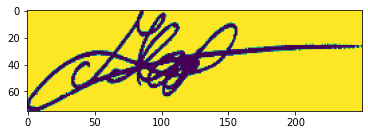

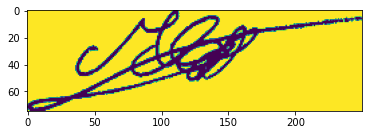

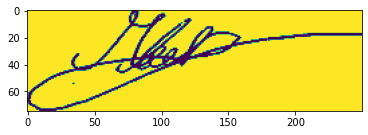

In [9]:
for i in [0,1,2]:
    plt.imshow(train_data[0][i])
    plt.show()

In [10]:
def create_test_data():
    testing_data = []
    
    for folder in tqdm(os.listdir(test_dir)):
        
        real1 = os.path.join(test_dir+"/"+folder,'1')
        real2 = os.path.join(test_dir+"/"+folder,'2')
        forge = os.path.join(test_dir+"/"+folder,'forg')
            
        i=0
        for r1,r2,f in zip(tqdm(os.listdir(real1)),tqdm(os.listdir(real2)),tqdm(os.listdir(forge))):
                
            i=i+1
            r1_path = os.path.join(real1,r1)
            r2_path = os.path.join(real2,r2)
            f_path = os.path.join(forge,f)
                
            kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
                
            try:
                r1_img = preprocess(r1_path)
            except:
                print(r1_path)
            
            try:
                r2_img = preprocess(r2_path) 
            except:
                print(r2_path)
                
            try:
                f_img = preprocess(f_path)
            except:
                print(f_path)
                     
            testing_data.append([np.array(r1_img),np.array(r2_img),np.array(f_img)])

            if i==10:
                break

    shuffle(testing_data)
    testing_data = np.array(testing_data)
    np.save('signature_test_75_250.npy', testing_data)        
    return testing_data

In [11]:
test_data = create_test_data()

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 17%|██████████████                                                                      | 1/6 [00:00<00:01,  4.58it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:00,  6.21it/s]


 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  5.58it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  7.12it/s]


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  5.75it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  6.86it/s]


 83%|███████████████████████

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.47it/s]


 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  9.35it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 10.22it/s]


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  8.40it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  8.74it/s]


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00,  7.50it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00,  7.68it/s]


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                       

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  8.72it/s]


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 17%|██████████████                                                                      | 1/6 [00:00<00:01,  4.75it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:01,  4.83it/s]


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  5.17it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  5.26it/s]


 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  5.90it/s]

 50%|███████████████████████

 17%|██████████████                                                                      | 1/6 [00:00<00:00,  6.51it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:00,  7.04it/s]


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  6.62it/s]

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  7.06it/s]


 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  6.63it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  6.86it/s]


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  6.68it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  6.85it/s]


 83%|███████████████████████

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00, 13.02it/s]


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00,  9.92it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00, 10.38it/s]


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]


 17%|██████████████                                                                      | 1/6 [00:00<00:00,  9.74it/s]

 17%|██████████████                                                                      | 1/6 [00:00<00:00,  9.97it/s]


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  9.53it/s]

 33%|███████████████████████

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  6.83it/s]


 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  7.30it/s]

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  7.15it/s]


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  7.73it/s]

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  7.68it/s]


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00,  8.26it/s]

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00,  8.15it/s]


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

  0%|                       

In [12]:
test_data.shape

(120, 3, 75, 250)

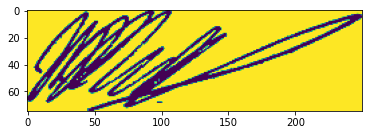

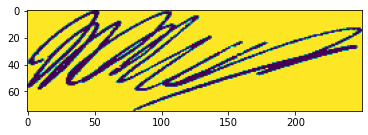

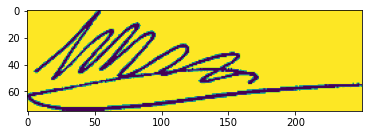

In [13]:
for i in [0,1,2]:
    plt.imshow(test_data[0][i])
    plt.show()